In [1]:
import networkx as nx
import numpy as np
import pylab as plt
import MeanMaker
import DatasetReader
from DataPaths import Paths


In [2]:
mm = MeanMaker.MeanMaker()
dr = DatasetReader.DatasetReader()

In [3]:
full_year_contents = dr.read_directories(Paths.full_year_pickle_path)
full_year_contents

Directories: ['testfolder']
Files: ['full_year_2016_CarCount.pkl', 'full_year_2017_CarCount.pkl', 'full_year_2020_CarCount.pkl', 'full_year_2021_CarCount.pkl']
Full file paths: ['YOUR_PATH\\data\\full_year_pickles\\full_year_2016_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2017_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2020_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2021_CarCount.pkl']

In [4]:
year = 2020
means_df = mm.create_means_from_monday(1, 2, year, 2, dr.read_pickle("YOUR_PATH\\data\\full_year_pickles\\full_year_2020_CarCount.pkl"), "CarCount")


[34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47]


In [5]:
from tslearn.metrics import dtw
from tslearn.metrics import cdist_dtw
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy as np

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [6]:
row_count = means_df.shape[0]
distance_matrix = np.zeros((row_count, row_count))
data = to_time_series_dataset(means_df["CarCount"])

In [7]:
scaled_data = TimeSeriesScalerMeanVariance().fit_transform(data)

In [8]:
dtw_dm = cdist_dtw(scaled_data, n_jobs=6, verbose=1)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:   13.9s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:   35.1s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:   44.0s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:   54.1s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

In [10]:
from sklearn.manifold import MDS

array([[  5.19592634, -15.25211462],
       [  4.08989807, -10.92953501],
       [-17.96414018,  -4.03249701],
       ...,
       [  5.08923109, -10.22383714],
       [ -0.41220696, -14.54882043],
       [  2.41920624, -12.4966181 ]])

In [9]:
embedding = MDS(n_components=2, dissimilarity="precomputed")
transformed = embedding.fit_transform(dtw_dm)

ValueError: array must be 2-dimensional and square. shape = (832, 2)

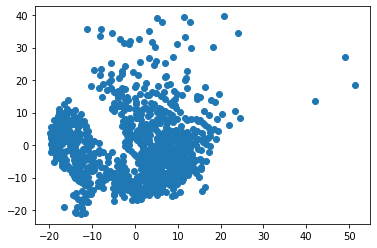

In [11]:
plt.scatter(transformed[:,0], transformed[:,1])

In [12]:
transformed[:,0]

array([ 5.19592634e+00,  4.08989807e+00, -1.79641402e+01, -1.58132593e+01,
       -1.71498915e+01, -1.26263400e+01, -1.59094248e+01, -1.52116463e+01,
        4.12732171e+00,  1.41547608e+00, -1.53888022e+01, -1.31296772e+01,
       -1.87291061e+01, -1.97301806e+01, -1.84715066e+01, -1.36721754e+01,
       -1.22683204e+01, -1.17378672e+01, -1.41505102e+01, -1.14181944e+01,
       -1.16479278e+01, -1.47363041e+01, -1.31120536e+01, -1.56777469e+01,
       -1.65040521e+01, -1.80694586e+01, -6.36212451e+00, -9.69250143e+00,
        1.56462012e+01,  1.53791924e+01,  8.20307847e-01,  3.50388305e-02,
       -1.55626280e+01, -1.41952297e+01, -1.03363509e+01, -1.30331927e+01,
       -1.61037437e+01, -1.31805744e+01, -8.39819019e+00, -4.88114519e+00,
        1.32279994e+01,  1.27308276e+01, -1.24931449e+01, -1.44163347e+01,
        9.62705018e+00,  3.78836283e+00,  1.30278276e+01,  1.08812116e+01,
       -1.17489555e+01, -1.23290955e+01, -1.53461783e+01, -1.77045810e+01,
       -1.42822216e+01, -

In [11]:
transformed = np.load("distance_matrix_from_scaled_2020.npy")

means_df["MDS_data_x"] = transformed[:,0]
means_df["MDS_data_y"] = transformed[:,1]

In [12]:
means_df

,lamId,year,startDay,weeksInMean,direction,CarCount,MDS_data_x,MDS_data_y
0,1,2020,34,2,1,"[12.0, 8.0, 3.0, 5.5, 5.5, 10.5, 5.5, 4.0, 4.5...",5.195926,-15.252115
1,1,2020,34,2,2,"[0.5, 9.5, 14.0, 7.0, 3.0, 4.5, 8.0, 5.0, 4.0,...",4.089898,-10.929535
2,3,2020,34,2,1,"[18.0, 11.5, 21.0, 15.5, 29.0, 12.5, 7.0, 15.5...",-17.964140,-4.032497
3,3,2020,34,2,2,"[8.0, 5.5, 2.0, 7.0, 11.5, 12.5, 12.0, 7.0, 4....",-15.813259,6.343890
4,4,2020,34,2,1,"[26.5, 28.0, 19.5, 18.5, 29.0, 16.0, 21.5, 23....",-17.149891,-6.427502
...,...,...,...,...,...,...,...,...
827,1603,2020,34,2,2,"[3.0, 1.5, 3.0, 5.0, 1.0, 1.0, 3.0, 1.0, 2.0, ...",4.949259,-6.660198
828,1606,2020,34,2,1,"[11.5, 9.5, 4.5, 5.5, 8.0, 7.0, 4.5, 8.5, 3.0,...",4.901346,-13.827429
829,1606,2020,34,2,2,"[3.0, 3.5, 3.0, 1.0, 4.0, 5.0, 4.5, 0.5, 3.0, ...",5.089231,-10.223837
830,1607,2020,34,2,1,"[9.5, 7.0, 4.0, 7.0, 9.5, 6.5, 7.0, 3.0, 3.0, ...",-0.412207,-14.548820


In [13]:
from tslearn.clustering import KShape

In [14]:
ks = KShape(3, random_state=1)

In [15]:
preds = ks.fit_predict(scaled_data)

In [16]:
color_options = [i for i in range(0, 265, 28)]
colors = []

for pred in preds:
  colors.append(color_options[pred])

In [17]:
%matplotlib qt 

plt.scatter(means_df["MDS_data_x"], means_df["MDS_data_y"], c=colors, alpha=0.5)

In [30]:
plt.figure()
for yi in range(9):
    plt.subplot(3, 3, 1 + yi)
    for xx in scaled_data[preds == yi][:15]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 2016)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [19]:
np.save("distance_matrix_from_scaled_2020.npy", transformed)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neigh = KNeighborsClassifier(n_neighbors=9)

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(transformed)

In [54]:
kmeans_preds = kmeans.predict(transformed)

In [55]:
color_options = [i for i in range(0, 265, 28)]
kmeans_colors = []

for pred in kmeans_preds:
  kmeans_colors.append(color_options[pred])
plt.scatter(means_df["MDS_data_x"], means_df["MDS_data_y"], c=kmeans_colors, alpha=0.5)

In [73]:
class_1_timeseries = scaled_data[np.array(kmeans_colors) == 0 * 28]

In [74]:
for i in range(len(class_1_timeseries)):
  plt.plot(class_1_timeseries[i])
plt.show()

In [76]:
from tslearn.clustering import TimeSeriesKMeans

In [77]:
ts_kmeans = TimeSeriesKMeans(n_clusters=9, verbose=True, random_state=1)

In [78]:
ts_kmeans_preds = ts_kmeans.fit_predict(scaled_data)


1078.931 --> 682.806 --> 667.121 --> 659.963 --> 655.241 --> 652.291 --> 650.397 --> 649.385 --> 648.660 --> 647.929 --> 647.538 --> 647.333 --> 647.118 --> 646.968 --> 646.833 --> 646.682 --> 646.478 --> 646.269 --> 645.987 --> 645.599 --> 645.196 --> 644.883 --> 644.493 --> 644.161 --> 644.079 --> 643.985 --> 643.782 --> 643.705 --> 643.672 --> 643.639 --> 643.589 --> 643.480 --> 643.331 --> 643.319 --> 643.319 --> 


In [81]:
color_options = [i for i in range(0, 265, 28)]
ts_kmeans_colors = []

for pred in ts_kmeans_preds:
  ts_kmeans_colors.append(color_options[pred])
plt.scatter(means_df["MDS_data_x"], means_df["MDS_data_y"], c=ts_kmeans_colors, alpha=0.5)

In [83]:
import statsmodels.api as sm

In [84]:
res = sm.tsa.seasonal_decompose(scaled_data[0])
resplot = res.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None